In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [35]:
## BRISE UPOZORENJA
import warnings
warnings.filterwarnings('ignore')

In [2]:
## UČITAVANJE TRAIN I TEST SKUPA

X_train = pd.read_hdf('X_train.h5' , key = 'X_train')
X_test = pd.read_hdf('X_test.h5', key = 'X_test')
y_train = X_train['PRIJEVREMENI_RASKID'].ravel()
X_train.drop(['PRIJEVREMENI_RASKID'], axis = 1, inplace = True)

## to je normalizirani skup, spreman za treniranje

[0.12978272 0.20087269 0.1111766  0.13017661 0.13519553 0.12908868
 0.00362731 0.00509487 0.01011202 0.00157274 0.00262341 0.00521607
 0.0082768  0.00467278 0.00146958 0.0055241  0.00335741 0.0026383
 0.01674773 0.02693885 0.01005966 0.03650589 0.00070673 0.01856291]


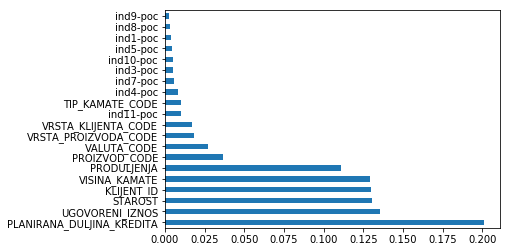

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train
y = y_train  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [25]:
X.columns

Index(['KLIJENT_ID', 'PLANIRANA_DULJINA_KREDITA', 'PRODULJENJA', 'STAROST',
       'UGOVORENI_IZNOS', 'VISINA_KAMATE', 'ind1-poc', 'ind10-poc',
       'ind11-poc', 'ind12-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc',
       'ind5-poc', 'ind6-poc', 'ind7-poc', 'ind8-poc', 'ind9-poc',
       'VRSTA_KLIJENTA_CODE', 'VALUTA_CODE', 'TIP_KAMATE_CODE',
       'PROIZVOD_CODE', 'GODINA_OTVARANJA_CODE', 'VRSTA_PROIZVODA_CODE',
       'PRIJEVREMENI_RASKID'],
      dtype='object')

In [26]:
features = ['PLANIRANA_DULJINA_KREDITA', 'UGOVORENI_IZNOS', 'STAROST', 'KLIJENT_ID', 'VISINA_KAMATE', 'PRODULJENJA',
            'VALUTA_CODE', 'PROIZVOD_CODE', 'VRSTA_PROIZVODA_CODE', 'VRSTA_KLIJENTA_CODE', 'TIP_KAMATE_CODE', 'ind4-poc', 'ind8-poc', 'GODINA_OTVARANJA_CODE']

In [21]:
X = X_train.copy()
X['PRIJEVREMENI_RASKID'] = y_train

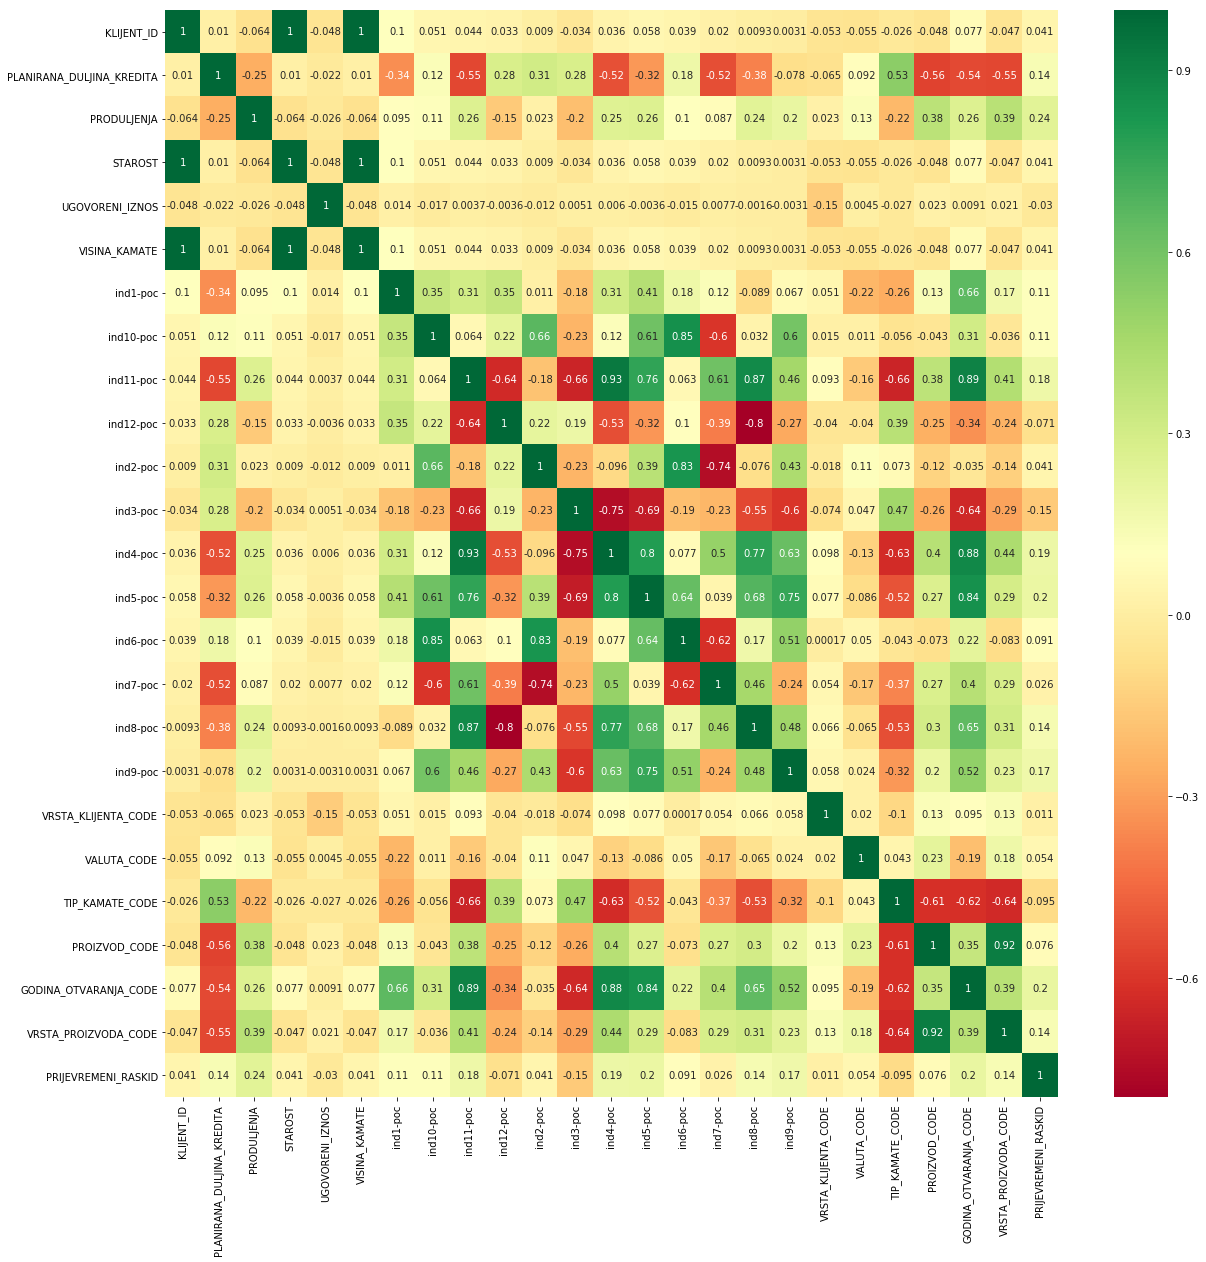

In [14]:
import seaborn as sns
#get correlations of each features in dataset
data = X
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [37]:
X_train_out = X_train[features]
X_train_out['PRIJEVREMENI_RASKID'] = y_train

In [32]:
X_test_out = X_test[features]

In [33]:
X_train_out.to_hdf('X_train_ft.h5', key= 'X_train_ft')

In [34]:
X_test_out.to_hdf('X_test_ft.h5', key= 'X_test_ft')